In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(df.dtypes)
print(df.shape)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
(891, 12)


In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [96]:
features = ['Survived', 'Pclass', 'Fare', 'Age', 'Parch', 'SibSp']

selected = df.loc[df['Age'] > 0, features]
selected['Sex'] = (df['Sex'] == 'male').astype(int)
x = StandardScaler().fit_transform(selected.values[:,1:])
print(x)
print(x[np.isnan(x)].shape)

[[ 0.91123237 -0.51897787 -0.53037664 -0.50589515  0.52457013  0.75905134]
 [-1.47636364  0.69189675  0.57183099 -0.50589515  0.52457013 -1.31743394]
 [ 0.91123237 -0.50621356 -0.25482473 -0.50589515 -0.55170307 -1.31743394]
 ...
 [-1.47636364 -0.08877362 -0.73704057 -0.50589515 -0.55170307 -1.31743394]
 [-1.47636364 -0.08877362 -0.25482473 -0.50589515 -0.55170307  0.75905134]
 [ 0.91123237 -0.50952283  0.15850313 -0.50589515 -0.55170307  0.75905134]]
(0,)


In [97]:
pca = PCA(n_components=2)

In [98]:
comp = pca.fit_transform(x)
comp_df = pd.DataFrame(data = comp, columns = ['principal component 1', 'principal component 2'])

In [99]:
data = comp_df.values.transpose()

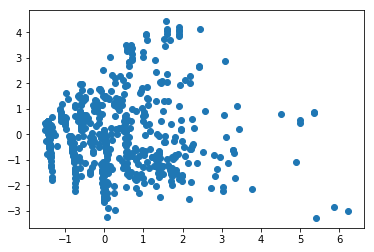

In [115]:
plt.scatter(data[0], data[1])

In [118]:
for a in selected[['Survived', 'Sex']].values[:5]:
    print(a[0])

0
1
1
1
0


In [124]:
colors = []

for entry in selected[['Survived', 'Sex']].values:
    if entry[0] == 0 and entry[1] == 0:
        colors.append('cornflowerblue')
    elif entry[0] == 0 and entry[1] == 1:
        colors.append('cyan')
    elif entry[0] == 1 and entry[1] == 0:
        colors.append('green')
    else:
        colors.append('springgreen')
        
len(colors)

714

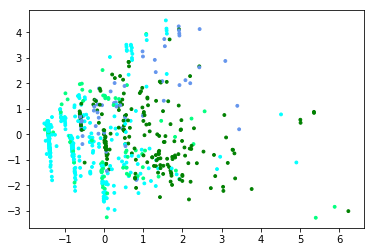

In [127]:
plt.scatter(data[0], data[1], c=colors, s=8)